# Final Project (part 1)


## Women's E-Commerce Dataset


In [43]:
### Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

from sklearn.naive_bayes import MultinomialNB
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

In [44]:
### Change Column Names
col_names = ['id' , 'Clothing_ID' , 'Age' , 'Title' , 'Review_Text' , 'Rating' , 
             'Recommended_IND' , 'Positive_Feedback_Count' , 
             'Division_Name' , 'Department_Name' , 'Class_Name']



In [45]:
### Load the first 10 rows of the Women's Clothing Ecommerce Review dataset
df = pd.read_csv('https://657efe09-c273-4ba6-932d-675fbcfb793f.filesusr.com/ugd/2b6409_e6921b20df3b482a8ab7da2bd1821482.csv?dn=Womens_Clothing_ECommerce_Reviews.csv',
                 sep='\t' , delimiter = ';' , skiprows = 1 ,  names = col_names )

df.head(10)


,id,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [46]:
### Delete the row 'id' from 'df' dataframe and create new dataframe called 'df_clean'
df_clean = df.drop(columns="id")

In [47]:
df_clean.head(10)

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing_ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review_Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended_IND          23486 non-null  int64 
 6   Positive_Feedback_Count  23486 non-null  int64 
 7   Division_Name            23472 non-null  object
 8   Department_Name          23472 non-null  object
 9   Class_Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [49]:
### Checking for the number of rows and columns
df_clean.shape

(23486, 10)

In [50]:
### Checking for duplicate values
df_clean.duplicated().sum()

21

In [51]:
#checking for null values
df_clean.isnull().sum()

Clothing_ID                   0
Age                           0
Title                      3810
Review_Text                 845
Rating                        0
Recommended_IND               0
Positive_Feedback_Count       0
Division_Name                14
Department_Name              14
Class_Name                   14
dtype: int64

In [52]:
#dropping the null values
df_clean=df.dropna()

In [53]:
#confirming null values are dropped
df_clean.shape

(19662, 11)

### Data Visualization

##### Pie Chart (% of each rating)

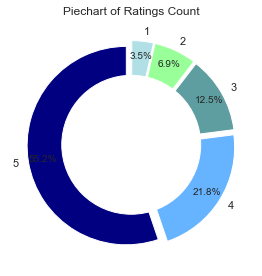

In [54]:
### Created a piechart that shows the percent of each rating count
import matplotlib.pyplot as plt
# Pie chart
labels = ['5', '4','3','2','1']
sizes = df_clean['Rating'].value_counts()
#colors
colors = ['navy','#66b3ff','#5F9EA0','#99ff99','#B0E0E6']
#explsion
explode = (0.05,0.05,0.05,0.05, 0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#Adjusts chart size
sns.set(rc={'figure.figsize':(16, 8)})
plt.title('Piechart of Ratings Count') 
plt.tight_layout()
plt.show()

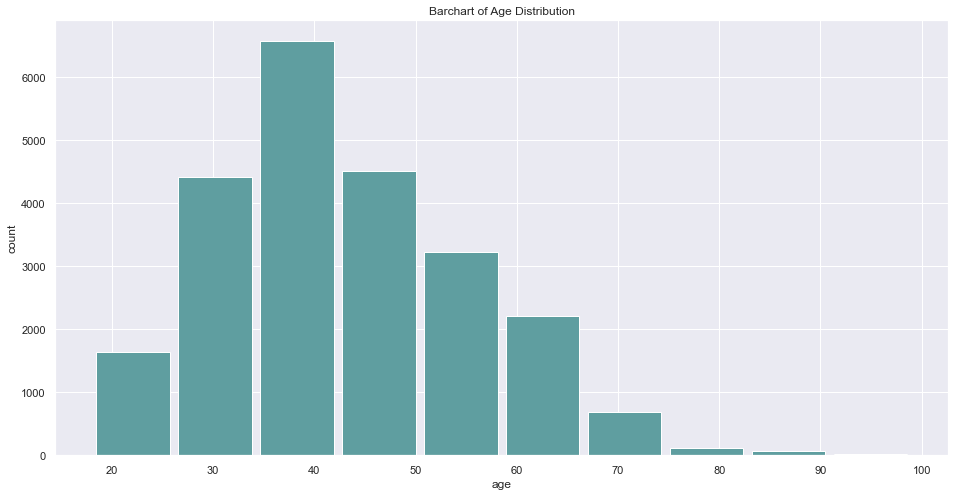

In [55]:
### Bar Chart of Age distribution
import matplotlib.pyplot as plt
# Pie chart
# labels = data['Age'].value_counts().values
sizes = df['Age']
bins  = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]



 

plt.hist(sizes,  histtype='bar', rwidth=0.9, color='#5F9EA0')

plt.xlabel('age')
plt.ylabel('count')
plt.title('Barchart of Age Distribution') 
plt.show()

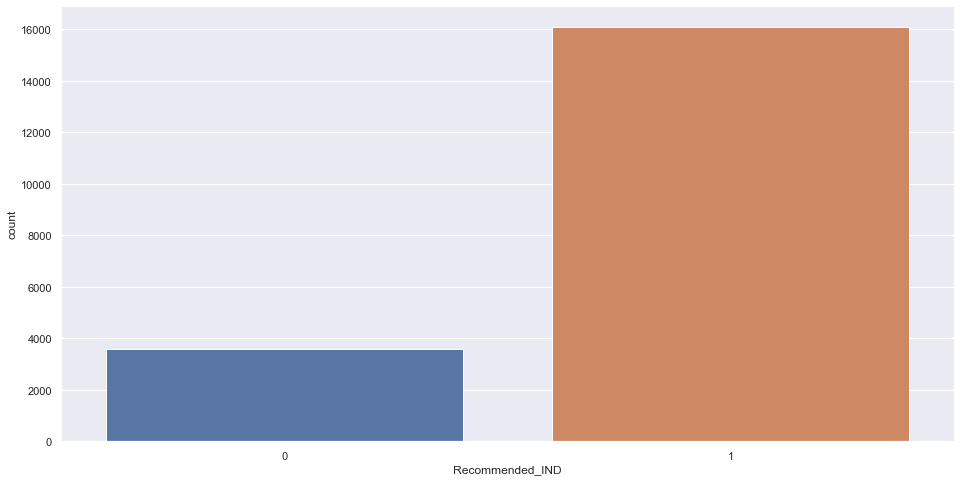

In [56]:
### Count plot of Recommended_IND
Recommended_IND_Count = sns.countplot(x='Recommended_IND',data=df_clean)

In [57]:
### 0 = no recommendation and 1 = recommendation
df_clean.groupby(['Recommended_IND']).count().Age/len(df_clean['Recommended_IND'])

Recommended_IND
0    0.181823
1    0.818177
Name: Age, dtype: float64

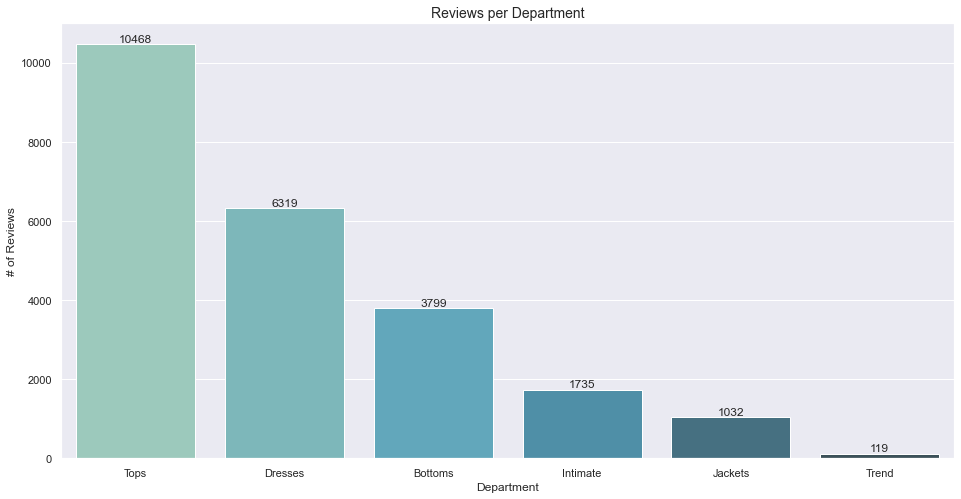

In [58]:
# department name vs reviews
ax=sns.countplot(x='Department_Name', data=df ,palette="GnBu_d", order = df['Department_Name'].value_counts().index)
ax.set_title("Reviews per Department", fontsize=14)
ax.set_ylabel("# of Reviews", fontsize=12)
ax.set_xlabel("Department", fontsize=12)
x=df['Department_Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

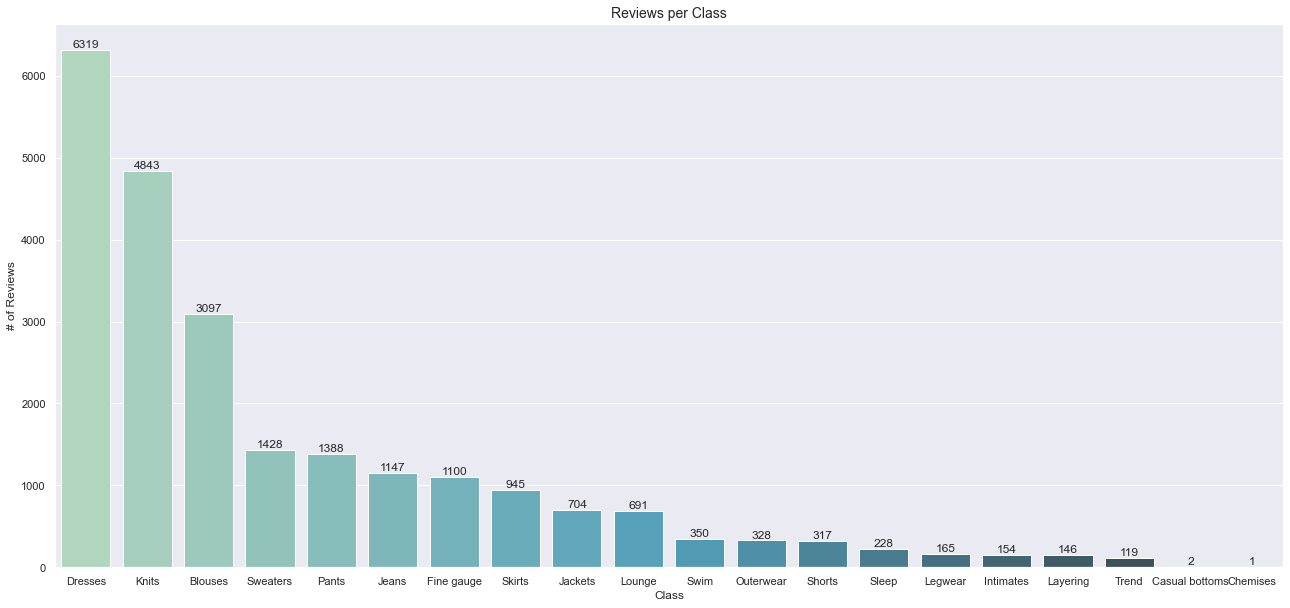

In [59]:
### Reviews per Class
plt.figure(figsize= (22,10  ))
ax=sns.countplot(x='Class_Name', data=df ,palette="GnBu_d", order = df['Class_Name'].value_counts().index)
ax.set_title("Reviews per Class", fontsize=14)
ax.set_ylabel("# of Reviews", fontsize=12)
ax.set_xlabel("Class", fontsize=12)
x=df['Class_Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Ratings per department'),
 Text(0, 0.5, 'rating count'),
 Text(0.5, 0, ' Department_Name')]

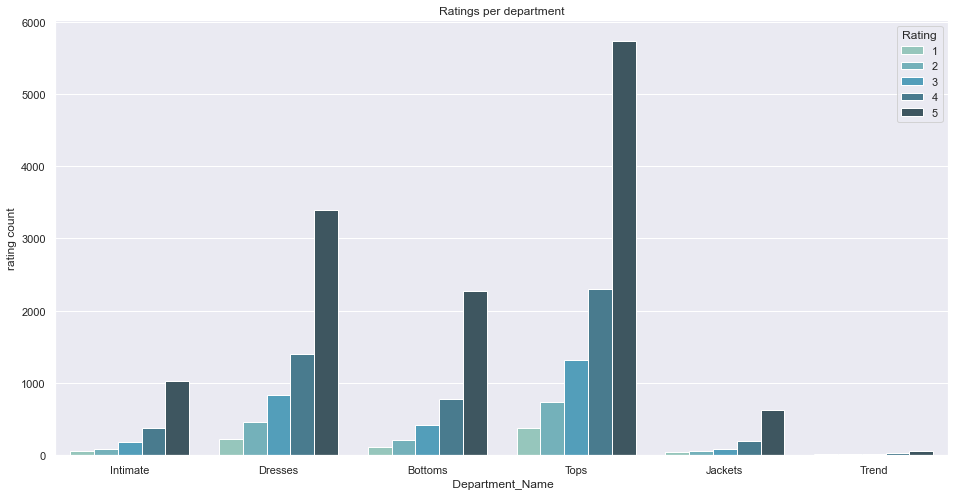

In [60]:
# investigating the relationship between department name and ratings
ratings= sns.countplot('Department_Name',palette="GnBu_d", hue = 'Rating', data = df)
ratings.set(title = "Ratings per department",
            ylabel =  'rating count',
        xlabel = " Department_Name")

In [61]:
### Create a new dataframe called 'df1'
df2 = df_clean[['Review_Text' , 'Rating','Age']].copy()
df2.head(5)

,Review_Text,Rating,Age
2,I had such high hopes for this dress and reall...,3,60
3,"I love, love, love this jumpsuit. it's fun, fl...",5,50
4,This shirt is very flattering to all due to th...,5,47
5,"I love tracy reese dresses, but this one is no...",2,49
6,I aded this in my basket at hte last mintue to...,5,39


In [62]:
#### Ignore all reviews with a rating of 3. A rating of 3 is considered a neutral rating.
df2= df2[df2['Rating'] != 3]

In [63]:
### Rating over 3 is considered a positive rating and rating under 3 is a negative rating
df2['Rating'] = df2['Rating'] >=4

df2.head(10)

,Review_Text,Rating,Age
3,"I love, love, love this jumpsuit. it's fun, fl...",True,50
4,This shirt is very flattering to all due to th...,True,47
5,"I love tracy reese dresses, but this one is no...",False,49
6,I aded this in my basket at hte last mintue to...,True,39
7,"I ordered this in carbon for store pick up, an...",True,39
8,I love this dress. i usually get an xs but it ...,True,24
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",True,34
12,More and more i find myself reliant on the rev...,True,53
13,Bought the black xs to go under the larkspur m...,True,44
15,I took these out of the package and wanted the...,True,47


In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17198 entries, 3 to 23485
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  17198 non-null  object
 1   Rating       17198 non-null  bool  
 2   Age          17198 non-null  int64 
dtypes: bool(1), int64(1), object(1)
memory usage: 419.9+ KB


In [65]:
### Change True values to Positive and False values to Negative
df2['Rating'] = df2['Rating'].replace({True : 'Positive'})

In [66]:
df2['Rating'] = df2['Rating'].replace({False : 'Negative'})
df2.head(10)

,Review_Text,Rating,Age
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive,50
4,This shirt is very flattering to all due to th...,Positive,47
5,"I love tracy reese dresses, but this one is no...",Negative,49
6,I aded this in my basket at hte last mintue to...,Positive,39
7,"I ordered this in carbon for store pick up, an...",Positive,39
8,I love this dress. i usually get an xs but it ...,Positive,24
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",Positive,34
12,More and more i find myself reliant on the rev...,Positive,53
13,Bought the black xs to go under the larkspur m...,Positive,44
15,I took these out of the package and wanted the...,Positive,47


In [67]:
df2['review_pos']=np.nan
review_pos=[]

In [68]:
df2['Review_Text'].astype(dtype='string')

3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
5        I love tracy reese dresses, but this one is no...
6        I aded this in my basket at hte last mintue to...
7        I ordered this in carbon for store pick up, an...
                               ...                        
23477    I'm so impressed with the beautiful color comb...
23478    I was surprised at the positive reviews for th...
23479    So i wasn't sure about ordering this skirt bec...
23481    I was very happy to snag this dress at such a ...
23485    This dress in a lovely platinum is feminine an...
Name: Review_Text, Length: 17198, dtype: string

In [69]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dustinward/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


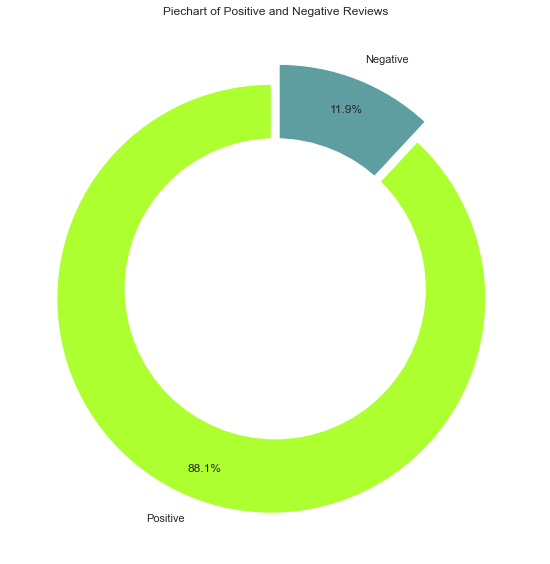

In [70]:
# Let’s see how the overall sentiment is using the sentiment we generated.


import matplotlib.pyplot as plt
# Pie chart
labels = ['Positive','Negative' ]
sizes = df2['Rating'].value_counts()
#colors
colors = ['#ADFF2F','#5F9EA0']
#explsion
explode = (0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#Adjusts chart size
sns.set(rc={'figure.figsize':(16, 8)})
plt.title('Piechart of Positive and Negative Reviews') 
plt.tight_layout()
plt.show()

### split data into training and test set

In [71]:
df2.head(5)

,Review_Text,Rating,Age,review_pos
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive,50,NaN
4,This shirt is very flattering to all due to th...,Positive,47,NaN
5,"I love tracy reese dresses, but this one is no...",Negative,49,NaN
6,I aded this in my basket at hte last mintue to...,Positive,39,NaN
7,"I ordered this in carbon for store pick up, an...",Positive,39,NaN


In [72]:
for i in df2.index:
    if type(df2['Review_Text'][i])==str:
        review_pos.append((sia.polarity_scores(df2['Review_Text'][i])['pos']))
    else:
        review_pos.append(np.nan)

In [73]:
df2['review_pos']=review_pos

In [74]:
### Split Data into training and test set
y = df2.Rating
X = df2[['review_pos','Age']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)

In [75]:
df2.head()

,Review_Text,Rating,Age,review_pos
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive,50,0.434
4,This shirt is very flattering to all due to th...,Positive,47,0.300
5,"I love tracy reese dresses, but this one is no...",Negative,49,0.147
6,I aded this in my basket at hte last mintue to...,Positive,39,0.096
7,"I ordered this in carbon for store pick up, an...",Positive,39,0.053


### Machine Learning Models

##### Naive Bayes classifier

In [76]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(X_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['Positive', 'Negative'])
print(cm)

0.8831923890063424
[[5013    0]
 [ 663    0]]


##### K-Nearest Neighbor

In [77]:
knn_classifier = KNeighborsClassifier()
# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Create the predicted tags: pred
pred = knn_classifier.predict(X_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
knn_cm = metrics.confusion_matrix(y_test, pred, labels=['Positive', 'Negative'])
print(knn_cm)

0.8710359408033826
[[4845  168]
 [ 564   99]]


##### Random Forest Classifer

In [78]:
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Create the predicted tags: pred
pred = rf_classifier.predict(X_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
rf_cm = metrics.confusion_matrix(y_test, pred, labels=['Positive', 'Negative'])
print(rf_cm)

0.8539464411557435
[[4702  311]
 [ 518  145]]


##### SGD Classifier

In [79]:
sgd_classifier = SGDClassifier()

# Fit the classifier to the training data
sgd_classifier.fit(X_train, y_train)

# Create the predicted tags: pred
pred = sgd_classifier.predict(X_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
sgd_cm = metrics.confusion_matrix(y_test, pred, labels=['Positive', 'Negative'])
print(sgd_cm)

0.8387949260042283
[[4433  580]
 [ 335  328]]


##### Decision Tree Classifier

In [80]:
tree_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
tree_classifier.fit(X_train, y_train)

# Create the predicted tags: pred
pred = tree_classifier.predict(X_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
tree_cm = metrics.confusion_matrix(y_test, pred, labels=['Positive', 'Negative'])
print(tree_cm)

0.8114869626497534
[[4399  614]
 [ 456  207]]


##### Logistic Regression Classifier

In [81]:
log_classifier = LogisticRegression()

# Fit the classifier to the training data
log_classifier.fit(X_train, y_train)

# Create the predicted tags: pred
pred = log_classifier.predict(X_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
log_cm = metrics.confusion_matrix(y_test, pred, labels=['Positive', 'Negative'])
print(log_cm)

0.8854827343199436
[[4991   22]
 [ 628   35]]


In [82]:
X_train.head()

,review_pos,Age
6663,0.184,64
19183,0.297,35
12516,0.267,39
11218,0.274,47
10053,0.048,32
